In [1]:
import pandas as pd
import numpy as np
import cv2
import seaborn as sns
import os
from os.path import join as pjoin
from matplotlib import pyplot as plt
import random
import warnings
import keras
from keras.callbacks import EarlyStopping
from keras.regularizers import l2 
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D,Conv1D,GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D,AveragePooling1D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.layers import average 
from keras.models import Input, Model
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from skimage.io import imshow
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib.patches import Rectangle
warnings.filterwarnings('ignore')

C:\Users\razer\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [3]:
# first we can see what does the feature look like
def get_raw_feature():
    video_data_dir='new23feature'
    X=[]
    Y=[]
    for video in os.listdir(video_data_dir):
        each_video= pjoin(video_data_dir,video)
        ## 'C:\\videofeature\\' using
#         l=each_video.split('t_')[1]

        # 'C:\\new_video_feature\\' using
        l=each_video.split('e_')[1]
        l=l.split('.')[0]
        LABEL=int(l)
        X.append(np.load(each_video))
        Y.append(LABEL)
#     Video_label=pd.read_csv('label.csv')
# #     Video_label=np.array(Video_label)[:,:-1]
    return X,Y


## 1 Read features from 19 npy files

In [4]:
X,Y=get_raw_feature()
Video_label=pd.read_csv('newall_label.csv')
# Video_label=np.array(Video_label)[:,:-1]
print('there are ',len(X),'videos')
print('feature of video [0]',X[0].shape)
print('video [0] is from video' ,Y[0])
print(Y)

there are  23 videos
feature of video [0] (153, 14)
video [0] is from video 11
[11, 113, 130, 143, 152, 16, 164, 171, 176, 192, 194, 207, 236, 237, 240, 253, 257, 258, 49, 59, 74, 78, 91]


In [5]:
Video_label

,GEARS - Depth Perception,GEARS - Bimanual Dexterity,GEARS - Efficiency,GEARS - Force Sensitivity,GEARS - Autonomy,GEARS - Robotic Control,label
0,2.000000,1.666667,2.000000,1.333333,2.666667,2.333333,11
1,1.333333,1.000000,1.000000,1.000000,1.000000,1.333333,16
2,3.000000,3.000000,2.000000,2.333333,2.666667,2.666667,49
3,2.333333,1.666667,1.666667,2.000000,1.666667,1.666667,59
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,74
5,2.500000,3.000000,2.000000,2.000000,2.500000,2.000000,78
6,4.000000,4.000000,4.000000,4.500000,4.500000,5.000000,91
7,2.500000,3.000000,2.500000,2.500000,3.000000,2.500000,113
8,3.000000,3.000000,2.500000,2.500000,3.000000,3.000000,130
9,3.000000,2.500000,2.500000,2.000000,2.500000,2.500000,143


In [6]:
range_label=pd.read_csv('range_label.csv')
range_label.head()

,VideoNum,DP,BD,E,FS,A,RC
0,11,3,2,2,2,4,3
1,11,2,2,3,1,3,3
2,11,1,1,1,1,1,1
3,16,1,1,1,1,1,1
4,16,2,1,1,1,1,2


In [7]:
counts=range_label['VideoNum'].value_counts()
counts

49     3
11     3
16     3
59     3
91     2
113    2
130    2
74     2
78     2
143    2
194    1
257    1
207    1
253    1
152    1
164    1
171    1
236    1
237    1
240    1
176    1
258    1
192    1
Name: VideoNum, dtype: int64

In [8]:
def get_review_times(videoNum):
    counts=range_label['VideoNum'].value_counts()
    times=int(counts[counts.index==videoNum])
    return times
get_review_times(192)

1

In [9]:
r_group=range_label.groupby(['VideoNum'])
r_max=r_group.max()
r_min=r_group.min()
r_max=r_max.reset_index()
r_min=r_min.reset_index()

In [10]:
def get_video_range(videoNum):
    vmax=r_max[r_max['VideoNum']==videoNum]
    vmin=r_min[r_min['VideoNum']==videoNum]
    return vmax,vmin

In [11]:
# a,i=get_video_range(11)

Video_label contains detail labels and we can use Y to index them later.

In [12]:
def getlabel(number):
    L=Video_label[Video_label['label']==number]
    L=np.array(L)[:,:-1]
    L= np.squeeze(L)
    return L
# def getlabel_addnoise(number):
#     L=Video_label[Video_label['label']==number]
#     L=np.array(L)[:,:-1]
#     L= np.squeeze(L)
#     noise=np.array([random.uniform(-0.4, 0.4) for _ in range(len(L))])
# #     print(noise)
#     return L+noise

Here we create two functions to sample video clips from each video and get their time differences.


In [13]:
def get_diff_and_hstack_to_orginal_data(X,time_lag=2,move_threshold=200):
    original=X[:-time_lag]
    modified=X[time_lag:]
    result=modified-original
    ## threshold
    # consider there was no top in the first image and it showed up in the next image
    # the difference would be huge, which was not ideal.
    # so we need to filter these extrem value 
    result[np.abs(result)>move_threshold]=0
    
    return np.hstack((X[time_lag:],result))

##from each video sample video clips with size=window_L. you can specify stride 
def make_video_clips(matrix,window_L,stride):
    alldata=[]

    total_frame=matrix.shape[0]
    index=[n for n in range(1,total_frame,stride)]
    for start_index in index:
        if start_index+window_L> total_frame:
            break
#         print(start_index)
        each_clip_data=matrix[start_index:start_index+window_L]
#         each_clip_data=np.transpose(each_clip_data)
#         print(each_clip_data.shape)
        alldata.append(each_clip_data)
    return np.array(alldata)

## 2 pre-processing the feature
make new 28-d feature and  sample video clips

In [14]:
####################################### set video clips parameters
############################################### make new 28-d feature
video_clips_length=30
time_lag=2
move_threshold=150
stride=video_clips_length

####################################### set video clips parameters
############################################### make new 28-d feature
all_data=[]
for each_video,label in zip(X,Y):

    re=get_diff_and_hstack_to_orginal_data(each_video,time_lag,move_threshold)
#     re=each_video
    video_clip=make_video_clips(re,video_clips_length,stride)
    print(video_clip.shape)
    all_data.append((video_clip))


(5, 30, 28)
(4, 30, 28)
(10, 30, 28)
(20, 30, 28)
(10, 30, 28)
(100, 30, 28)
(40, 30, 28)
(19, 30, 28)
(100, 30, 28)
(5, 30, 28)
(100, 30, 28)
(10, 30, 28)
(10, 30, 28)
(5, 30, 28)
(20, 30, 28)
(40, 30, 28)
(99, 30, 28)
(9, 30, 28)
(20, 30, 28)
(40, 30, 28)
(20, 30, 28)
(10, 30, 28)
(10, 30, 28)


So there are 19 videos and you can see how many video clips they have.

And next we will use leave one method to train the model.

## 3 prepare leave one data and give every video clips their label

In [15]:
# this function is used to stack 18 videos into a big matrix
# the dimenstion will be 
# (n1+n2..+n18,28,30)
# and the label will be (n1+n2..+n18,6)

def stack_video_clips_get_label(data,label):
    final_data=data[0]

    final_label=[getlabel(label[0]) for _ in range(final_data.shape[0])]
#     print(len(final_label))
#     print(final_data.shape)
    for i in range(1,len(data)):
        final_data=np.vstack((final_data,data[i]))
        for j in range(data[i].shape[0]):
            final_label.append(getlabel(label[i]))
    return final_data,np.array(final_label)

########## leave one and stack all video clips
def hold_out(X,Y,hold_number):
        new_label=Y.copy()
        new_data=X.copy()
        # find video n 's index
        index=new_label.index(hold_number)
        # get the video n and it's label
        X_test=new_data[index]
        test_label=getlabel(hold_number)
        y_test=np.array([test_label for _ in range(X_test.shape[0])])
#         # so we can del them 
        del new_label[index]
        del new_data[index]
#         print(new_label)
        final_data_X,final_data_Y=stack_video_clips_get_label(new_data,new_label)
        return final_data_X,X_test,final_data_Y,y_test

In [16]:
# for each col, calculate the weighted average
def get_weighted_average(df):
    length=len(df)
    top=int(1/6*length)
    bottom=length-top
    df=np.array(df)
    df=np.sort(df)
    weghted_sum=np.sum(df[:top]*(1/6))+np.sum(df[top+1:bottom]*(2/3))+np.sum(df[bottom+1:]*(1/6))
    weghted_sum=weghted_sum/length
    return weghted_sum

# make the data frame
# Plot_data is the pridect result, which will have 6 scores
def get_video_score(Plot_data,GT,poolingweight):
    weight_ave_re=[]
    mean_re=[]
    median_re=[]
    pooled_re=[]
    
    for i in Plot_data.columns:
        weight_ave=get_weighted_average(Plot_data[i])
        weight_ave_re.append(weight_ave)
        
        mean_value=np.mean(Plot_data[i])   
        mean_re.append(mean_value)
        
        median_value = np.median(Plot_data[i])
        median_re.append(median_value)
        
        weight_ave_wight=poolingweight[0]
        mean_value_wight=poolingweight[1]
        median_value_wight=poolingweight[2]
        # pooling is also a weighted average 
        pooling = (weight_ave*weight_ave_wight + mean_value*mean_value_wight + median_value*median_value_wight)
        pooled_re.append(pooling)
        
    video_result=pd.DataFrame([weight_ave_re,mean_re,median_re,pooled_re,GT])
    video_result.columns = ['DP','BD','E','FS','A','RC']
    video_result.index = ['Weighted_average', 'Mean', 'Median','Cool_pooling','Ground_truth']
    return video_result

## 3 perform leave one cross validation  


In [17]:
from keras.layers import average, concatenate,RepeatVector,Lambda,add,subtract,Activation
from keras.models import Input, Model
from keras import backend as K
from keras.layers.normalization import BatchNormalization

In [18]:
# the model we will use
def make_model_1d_3layer(l2_lambda,clip_lenth,dimension):
    input_holder = Input(shape=(clip_lenth, dimension))
    x = Conv1D(filters=8, 
                     kernel_size=15, 
                     padding='same',
                     activation='relu', 
                     input_shape=(clip_lenth, dimension),
                     kernel_regularizer=l2(l2_lambda)
              )(input_holder)
    x = BatchNormalization()(x)

    x = Conv1D(filters=8, 
                     kernel_size=10, 
                     padding='same',
                     activation='relu', 
                     input_shape=(clip_lenth, dimension),
                    kernel_regularizer=l2(l2_lambda)
              )(x)
    x = BatchNormalization()(x)
    x = Conv1D(filters=8, 
                     kernel_size=10, 
                     padding='same',
                     activation='relu', 
                     input_shape=(clip_lenth, dimension),
                     kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x= MaxPooling1D(2,padding='same')(x)
    
    x = Conv1D(filters=16, 
                     kernel_size=5, 
                     padding='same',
                     activation='relu', 
                     input_shape=(clip_lenth, dimension),
                    kernel_regularizer=l2(l2_lambda)
              )(x)
    x = BatchNormalization()(x)

    x = Conv1D(filters=16, 
                     kernel_size=5, 
                     padding='same',
                     activation='relu', 
                     input_shape=(clip_lenth, dimension),
                     kernel_regularizer=l2(l2_lambda)
              )(x)
    x = BatchNormalization()(x)
    x = Conv1D(filters=16, 
                     kernel_size=5, 
                     padding='same',
                     activation='relu', 
                     input_shape=(clip_lenth, dimension),
                     kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
#     x = GlobalMaxPooling1D()(x)
#     x = Flatten()(x)

#####_______________________________________________________________________
    u = GlobalMaxPooling1D()(x)
    u_broadcast=RepeatVector(x.shape[1])(u)
    
    def op(inputs):
        x, y = inputs
        return K.pow((x - y), 2) 

    Z=Lambda(op)([u_broadcast,x])

    v = GlobalMaxPooling1D()(Z)
    x = concatenate([u,v])
    
#####_______________________________________________________________________
#     x = Dense(16, 
#               activation='relu',
#               kernel_initializer='he_uniform',
#               kernel_regularizer=l2(l2_lambda)
#             )(x)

#     x = Dropout(0.5)(x) # add some dropout for regularization after conv layers
    
#     x = Dense(6, 
#               activation='sigmoid', 
#               kernel_initializer='glorot_uniform',
#               kernel_regularizer=l2(l2_lambda)
#              )(x)
    
#####_______________________________________________________________________  
#     x = Dense(16,activation='relu',
#               kernel_regularizer=l2(l2_lambda)
#              )(x)
#     x = Dropout(0.5)(x) # add some dropout for regularization after conv layers


#     x = Dense(32,activation='relu',kernel_initializer='he_uniform',
#               kernel_regularizer=l2(l2_lambda)
#              )(x)
#     x = Dropout(0.5)(x) # add some dropout for regularization after conv layers

#####______________________________Multi task_________________________________________  
# ['DP','BD','E','FS','A','RC']
    number_of_N=16
    DP=0.2
    
    y1 = Dense(number_of_N,kernel_initializer='he_uniform',
             # kernel_regularizer=l2(l2_lambda)
             )(x)
    y1 = BatchNormalization()(y1)
    y1 = Activation('relu')(y1)
    y1 = Dropout(DP)(y1) # add some dropout for regularization after conv layers
    y1= Dense(1, activation='sigmoid',kernel_initializer='glorot_uniform',name='DP'
#              kernel_regularizer=l2(l2_lambda)
             )(y1)

    y2 = Dense(number_of_N,kernel_initializer='he_uniform',
             # kernel_regularizer=l2(l2_lambda)
             )(x)
    y2 = BatchNormalization()(y2)
    y2 = Activation('relu')(y2)
    y2 = Dropout(DP)(y2) # add some dropout for regularization after conv layers
    y2= Dense(1, activation='sigmoid',kernel_initializer='glorot_uniform',name='BD'
#              kernel_regularizer=l2(l2_lambda)
             )(y2)
    
    y3 = Dense(number_of_N,kernel_initializer='he_uniform',
             # kernel_regularizer=l2(l2_lambda)
             )(x)
    y3 = BatchNormalization()(y3)
    y3 = Activation('relu')(y3)
    y3 = Dropout(DP)(y3) # add some dropout for regularization after conv layers
    y3= Dense(1, activation='sigmoid',kernel_initializer='glorot_uniform',name='E'
#              kernel_regularizer=l2(l2_lambda)
             )(y3)

    y4 = Dense(number_of_N,kernel_initializer='he_uniform',
             # kernel_regularizer=l2(l2_lambda)
             )(x)
    y4 = BatchNormalization()(y4)
    y4 = Activation('relu')(y4)
    y4 = Dropout(DP)(y4) # add some dropout for regularization after conv layers
    y4= Dense(1, activation='sigmoid',kernel_initializer='glorot_uniform',name='FS'
#              kernel_regularizer=l2(l2_lambda)
             )(y4)
    
    y5 = Dense(number_of_N,kernel_initializer='he_uniform',
             # kernel_regularizer=l2(l2_lambda)
             )(x)
    y5 = BatchNormalization()(y5)
    y5 = Activation('relu')(y5)
    y5 = Dropout(DP)(y5) # add some dropout for regularization after conv layers
    y5= Dense(1, activation='sigmoid',kernel_initializer='glorot_uniform',name='A'
#              kernel_regularizer=l2(l2_lambda)
             )(y5)
    
    y6 = Dense(number_of_N,kernel_initializer='he_uniform',
             # kernel_regularizer=l2(l2_lambda)
             )(x)
    y6 = BatchNormalization()(y6)
    y6 = Activation('relu')(y6)
    y6 = Dropout(DP)(y6) # add some dropout for regularization after conv layers
    y6= Dense(1, activation='sigmoid',kernel_initializer='glorot_uniform',name='RC'
#              kernel_regularizer=l2(l2_lambda)
             )(y6)
#####______________________________Multi task_________________________________________  


    model = Model(inputs=input_holder,outputs=[y1,y2,y3,y4,y5,y6])
# ['DP','BD','E','FS','A','RC']
    losses = {
        "DP": "mean_squared_error",
        "BD": "mean_squared_error",
        "E": "mean_squared_error",
        "FS": "mean_squared_error",
        "A": "mean_squared_error",
        "RC": "mean_squared_error",
    }
    model.compile(#loss='mean_squared_error', # 'categorical_crossentropy' 'mean_squared_error' 'mean_absolute_percentage_error'
                  loss=losses, 
              optimizer='adam') # 'adadelta' 'rmsprop'                  
#     model.summary()
    return model
te=make_model_1d_3layer(0.001,30,28)

In [19]:
# the model we will use
def make_model_1d(l2_lambda,clip_lenth,dimension):
    input_holder = Input(shape=(clip_lenth, dimension))
    x = Conv1D(filters=8, 
                     kernel_size=15, 
                     padding='same',
                     activation='relu', 
                     input_shape=(clip_lenth, dimension),
                     kernel_regularizer=l2(l2_lambda)
              )(input_holder)
    x = BatchNormalization()(x)

    x = Conv1D(filters=8, 
                     kernel_size=10, 
                     padding='same',
                     activation='relu', 
                     input_shape=(clip_lenth, dimension),
                    kernel_regularizer=l2(l2_lambda)
              )(x)
#     x = Conv1D(filters=8, 
#                      kernel_size=5, 
#                      padding='same',
#                      activation='relu', 
#                      input_shape=(clip_lenth, dimension),
#                      kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x= MaxPooling1D(2,padding='same')(x)
    
    x = Conv1D(filters=16, 
                     kernel_size=5, 
                     padding='same',
                     activation='relu', 
                     input_shape=(clip_lenth, dimension),
                    kernel_regularizer=l2(l2_lambda)
              )(x)
    x = BatchNormalization()(x)

    x = Conv1D(filters=16, 
                     kernel_size=5, 
                     padding='same',
                     activation='relu', 
                     input_shape=(clip_lenth, dimension),
                     kernel_regularizer=l2(l2_lambda)
              )(x)
    x = BatchNormalization()(x)
#     x = Conv1D(filters=16, 
#                      kernel_size=5, 
#                      padding='same',
#                      activation='relu', 
#                      input_shape=(clip_lenth, dimension),
#                      kernel_regularizer=l2(l2_lambda))(x)

#     x = GlobalMaxPooling1D()(x)
#     x = Flatten()(x)

#####_______________________________________________________________________
    u = GlobalMaxPooling1D()(x)
    u_broadcast=RepeatVector(x.shape[1])(u)
    
    def op(inputs):
        x, y = inputs
        return K.pow((x - y), 2) 

    Z=Lambda(op)([u_broadcast,x])

    v = GlobalMaxPooling1D()(Z)
    x = concatenate([u,v])
    
#####_______________________________________________________________________
#     x = Dense(16, 
#               activation='relu',
#               kernel_initializer='he_uniform',
#               kernel_regularizer=l2(l2_lambda)
#             )(x)

#     x = Dropout(0.5)(x) # add some dropout for regularization after conv layers
    
#     x = Dense(6, 
#               activation='sigmoid', 
#               kernel_initializer='glorot_uniform',
#               kernel_regularizer=l2(l2_lambda)
#              )(x)
    
#####_______________________________________________________________________  
#     x = Dense(16,activation='relu',
#               kernel_regularizer=l2(l2_lambda)
#              )(x)
#     x = Dropout(0.5)(x) # add some dropout for regularization after conv layers


#     x = Dense(32,activation='relu',kernel_initializer='he_uniform',
#               kernel_regularizer=l2(l2_lambda)
#              )(x)
#     x = Dropout(0.5)(x) # add some dropout for regularization after conv layers

#####______________________________Multi task_________________________________________  
# ['DP','BD','E','FS','A','RC']
    number_of_N=16
    DP=0.2
    
    y1 = Dense(number_of_N,kernel_initializer='he_uniform',
             # kernel_regularizer=l2(l2_lambda)
             )(x)
    y1 = BatchNormalization()(y1)
    y1 = Activation('relu')(y1)
    y1 = Dropout(DP)(y1) # add some dropout for regularization after conv layers
    y1= Dense(1, activation='sigmoid',kernel_initializer='glorot_uniform',name='DP'
#              kernel_regularizer=l2(l2_lambda)
             )(y1)

    y2 = Dense(number_of_N,kernel_initializer='he_uniform',
             # kernel_regularizer=l2(l2_lambda)
             )(x)
    y2 = BatchNormalization()(y2)
    y2 = Activation('relu')(y2)
    y2 = Dropout(DP)(y2) # add some dropout for regularization after conv layers
    y2= Dense(1, activation='sigmoid',kernel_initializer='glorot_uniform',name='BD'
#              kernel_regularizer=l2(l2_lambda)
             )(y2)
    
    y3 = Dense(number_of_N,kernel_initializer='he_uniform',
             # kernel_regularizer=l2(l2_lambda)
             )(x)
    y3 = BatchNormalization()(y3)
    y3 = Activation('relu')(y3)
    y3 = Dropout(DP)(y3) # add some dropout for regularization after conv layers
    y3= Dense(1, activation='sigmoid',kernel_initializer='glorot_uniform',name='E'
#              kernel_regularizer=l2(l2_lambda)
             )(y3)

    y4 = Dense(number_of_N,kernel_initializer='he_uniform',
             # kernel_regularizer=l2(l2_lambda)
             )(x)
    y4 = BatchNormalization()(y4)
    y4 = Activation('relu')(y4)
    y4 = Dropout(DP)(y4) # add some dropout for regularization after conv layers
    y4= Dense(1, activation='sigmoid',kernel_initializer='glorot_uniform',name='FS'
#              kernel_regularizer=l2(l2_lambda)
             )(y4)
    
    y5 = Dense(number_of_N,kernel_initializer='he_uniform',
             # kernel_regularizer=l2(l2_lambda)
             )(x)
    y5 = BatchNormalization()(y5)
    y5 = Activation('relu')(y5)
    y5 = Dropout(DP)(y5) # add some dropout for regularization after conv layers
    y5= Dense(1, activation='sigmoid',kernel_initializer='glorot_uniform',name='A'
#              kernel_regularizer=l2(l2_lambda)
             )(y5)
    
    y6 = Dense(number_of_N,kernel_initializer='he_uniform',
             # kernel_regularizer=l2(l2_lambda)
             )(x)
    y6 = BatchNormalization()(y6)
    y6 = Activation('relu')(y6)
    y6 = Dropout(DP)(y6) # add some dropout for regularization after conv layers
    y6= Dense(1, activation='sigmoid',kernel_initializer='glorot_uniform',name='RC'
#              kernel_regularizer=l2(l2_lambda)
             )(y6)
#####______________________________Multi task_________________________________________  


    model = Model(inputs=input_holder,outputs=[y1,y2,y3,y4,y5,y6])
# ['DP','BD','E','FS','A','RC']
    losses = {
        "DP": "mean_squared_error",
        "BD": "mean_squared_error",
        "E": "mean_squared_error",
        "FS": "mean_squared_error",
        "A": "mean_squared_error",
        "RC": "mean_squared_error",
    }
    model.compile(#loss='mean_squared_error', # 'categorical_crossentropy' 'mean_squared_error' 'mean_absolute_percentage_error'
                  loss=losses, 
              optimizer='adam') # 'adadelta' 'rmsprop'                  
#     model.summary()
    return model
te=make_model_1d(0.001,30,28)

In [20]:
# from IPython.display import SVG
# from keras.utils import plot_model
# from keras.utils.vis_utils import model_to_dot
# SVG(model_to_dot(te).create(prog='dot', format='svg'))

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [21]:
te.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 30, 28)       0                                            
__________________________________________________________________________________________________
conv1d_7 (Conv1D)               (None, 30, 8)        3368        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_13 (BatchNo (None, 30, 8)        32          conv1d_7[0][0]                   
__________________________________________________________________________________________________
conv1d_8 (Conv1D)               (None, 30, 8)        648         batch_normalization_13[0][0]     
__________________________________________________________________________________________________
batch_norm

In [22]:
# plot_model(te, to_file='model1.png')

In [23]:
# customized data generator
def generator_noise(data, label, batch_size=64,noise_range=0.1):
    while 1:
        DP = []  
        BD = []
        E = []
        FS = []
        A = []
        RC = []
        rows = np.random.randint(0, data.shape[0], size=batch_size)

        samples = data[rows]
        y=label[rows]
        noise=np.random.uniform(low=-noise_range, high=noise_range, size=(y.shape[0],y.shape[1]))
        y=y+noise
        for i in range(len(y)):
            DP.append(y[i][0])
            BD.append(y[i][1])
            E.append(y[i][2])
            FS.append(y[i][3])
            A.append(y[i][4])
            RC.append(y[i][5])
        labels = [np.array(DP),np.array(BD),np.array(E),np.array(FS), np.array(A),np.array(RC)]
        yield samples,labels
        
def generator(data, label, batch_size=64):
    while 1:
        DP = []  
        BD = []
        E = []
        FS = []
        A = []
        RC = []
        rows = np.random.randint(0, data.shape[0], size=batch_size)

        samples = data[rows]
        y=label[rows]
#         noise=np.random.uniform(low=-0.5, high=0.5, size=(y.shape[0],y.shape[1]))
#         y=y+noise
        for i in range(len(y)):
            DP.append(y[i][0])
            BD.append(y[i][1])
            E.append(y[i][2])
            FS.append(y[i][3])
            A.append(y[i][4])
            RC.append(y[i][5])
        labels = [np.array(DP),np.array(BD),np.array(E),np.array(FS), np.array(A),np.array(RC)]
        yield samples,labels

In [24]:
def test_hold_out(model_name,hold_out_number,E,show_result=False,l2lambd=0.001,noise_range=0.1,poolingweight=[0.2,0.4,0.4]):
    # using leave one cv to get train/test data
    X_train, X_test, y_train, y_test=hold_out(all_data,Y,hold_out_number)
    
    # scale all the value to 0-1
    X_train=X_train/640-0.5
    X_test=X_test/640-0.5
    y_train=y_train/5
    y_test=y_test/5
#     y_train=y_train
#     y_test=y_test
    # print(X_train.shape,y_train.shape)
    # print(X_test.shape,y_test.shape)

    sample_of_trainningdata=X_train.shape[0]
    sample_of_testdata=X_test.shape[0]

    batch_size=128

    train_gen=generator_noise(X_train, y_train, batch_size,noise_range)
    val_gen=generator(X_test, y_test, batch_size)
    
    #prepare for inout shape
    clip_lenth=X_train.shape[1]
    dimension=X_train.shape[2]
    
    if model_name=='CNN':    
        model=make_model_1d(l2lambd,clip_lenth,dimension)
    if model_name =='CNN3':
        model=make_model_1d_3layer(l2lambd,clip_lenth,dimension)
        
    model_h=model.fit_generator(train_gen,
                        steps_per_epoch=sample_of_trainningdata//batch_size,
                        epochs=E,
                        validation_data=val_gen,
                       validation_steps=sample_of_testdata//batch_size +1 ,
                        verbose=0 )
  
    GT=list(getlabel(hold_out_number))

    #get pridect result
    predict=model.predict(X_test)
    data={}
    task=['DP','BD','E','FS','A','RC']

    for i in range(len(predict)):
        data[task[i]]=np.squeeze(predict[i])

#         Plot_data=pd.DataFrame(predict,columns=['DP','BD','E','FS','A','RC'])
    Plot_data=pd.DataFrame(data)
    Plot_data=Plot_data*5

#         print(Plot_data)
#         print(Plot_data.shape)
    video_result=get_video_score(Plot_data,GT,poolingweight)
    gt=video_result.iloc[4]
    re=video_result.iloc[3]
    each_diff=np.abs(re-gt)
    
    if show_result:
        ax=plt.figure(figsize=(12,14))
        ax = plt.subplot(321)
        ax.plot(model_h.history['loss'])
        plt.ylabel('Training Loss')
        plt.xlabel('epochs')

        ax = plt.subplot(322)
        ax.plot(model_h.history['val_loss'])
        plt.ylabel('valadation Loss')
        plt.xlabel('epochs')
        print('loss',model_h.history['val_loss'][-1])
    
        y=[x for x in range(1,7)]
        ax = plt.subplot(323)
        Plot_data.plot.box(ax=ax)

        
        ax.plot(y, re, label='predict')
        ax.plot(y, gt, label='ground truth')

        plt.ylabel('Gear Score')
        plt.xlabel('Score type')
        plt.ylim(0,5.5)
        ax.legend()

        ax = plt.subplot(324)
        Plot_data.plot(ax=ax)
#         ax.plot(Plot_data)
        ax.legend(['DP','BD','E','FS','A','RC'])
#         ax.plot(Plot_data.BD)
        plt.ylabel('Gear Score')
        plt.xlabel('Video clips length')

        
        ax = plt.subplot(325)
        times=get_review_times(hold_out_number)
        ax.plot(y, np.round(re), label='predict-round')
        
        
        
        plt.ylabel('Gear Score')
        plt.xlabel('Score type')
        plt.ylim(0,5.5)
        
        if times>1:
#             ax.plot(y, re, label='predict')
            
            vmax,vmin=get_video_range(hold_out_number)
#             print(vmax)
#             print(vmin)
            it=1
            for types in ['DP','BD','E','FS','A','RC']:
                Range=vmax[types]-vmin[types]
                rect = Rectangle((it, vmin[types]), 0.2, Range, color='green')
                ax.add_patch(rect)   
                it=it+1
        else:
#             new_re=np.round(video_result.iloc[3])
#             ax.plot(y, new_re, label='predict-round')
            
            ax.plot(y, gt, label='ground truth')            
           
        labels=['','DP','BD','E','FS','A','RC']
        ax.set_xticklabels(labels)
        ax.legend()
#         plt.savefig(str(hold_out_number)+'result.png')
        plt.show()
        
    return model_h.history['val_loss'][-1],list(each_diff)


In [25]:
print(Y)
# E=1
# show_result=True
# l2lam=0.000000001
# noise_range=0.1

# model_name='CNN'
# print("you can try the video number above")
# l,d=test_hold_out(model_name,11,E,show_result,l2lam,noise_range)

[11, 113, 130, 143, 152, 16, 164, 171, 176, 192, 194, 207, 236, 237, 240, 253, 257, 258, 49, 59, 74, 78, 91]


In [26]:
# ####un-comment the code blow to test all the video
# # def test_hold_out(model_name,hold_out_number,E,show_result=False,l2=0.001,noise_range=0.1):
# Diff_plot=[]
# E=20
# show_result=True
# l2lam=0.01
# noise_range=0.1

# total_loss=0
# model_name='CNN'
# # for i in [11, 113, 130]:
# for i in Y:
#     print('video',i)
#     loss,each_diff=test_hold_out(model_name,i,E,show_result,l2lam,noise_range,pooling)
#     total_loss=total_loss+loss
#     Diff_plot.append(each_diff)
# print('total_loss= ',total_loss)

# Diff_plot=np.array(Diff_plot)
# Diff_plot=pd.DataFrame(Diff_plot)
# Diff_plot.columns = ['DP','BD','E','FS','A','RC']
# Diff_plot.plot.box()

In [27]:
def get_swarm_data(Diff_plot):
    name=['DP','BD','E','FS','A','RC']
    err=[]
    typen=[]
    for n in name:
        for record in Diff_plot[n]:
            err.append(record)
            typen.append(n)

    swarm_data = {'err': err, 'score_type':typen}
    swarm_data = pd.DataFrame(data=swarm_data)
    return swarm_data


In [28]:
def model_slection(model_name,E,l2lam,noise_range,poolingweight):  
    Diff_plot=[]
#     E=20
#     l2lam=0.01
#     noise_range=0.1
    show_result=False

    total_loss=0
    
#     for i in [11,113]:
    for i in Y:
        print('video',i,end=' ')
        loss,each_diff=test_hold_out(model_name,i,E,show_result,l2lam,noise_range,poolingweight)
        total_loss=total_loss+loss
        Diff_plot.append(each_diff)

    ax=plt.figure(figsize=(16,5))
    
    Diff_plot=np.array(Diff_plot)
    Diff_plot=pd.DataFrame(Diff_plot)
    Diff_plot.columns = ['DP','BD','E','FS','A','RC']
    ax = plt.subplot(131)
    Diff_plot.plot.box(ax=ax)
    plt.ylim(0,4.5)
    print('total_loss= ',total_loss)
    

    bx = plt.subplot(132)
    swarm_data=get_swarm_data(Diff_plot)
    bx = sns.swarmplot(x="score_type", y="err", data=swarm_data)
    plt.ylim(0,4.5)

    
    cx = plt.subplot(133)
    cx = sns.violinplot(x="score_type", y="err", data=swarm_data)
    plt.ylim(0,4.5)
    plt.show()
    
    print('all gear score abs error',np.sum(np.sum(Diff_plot)))
    print('each gear score abs error\n',np.sum(Diff_plot))
    weight=''
    for i in poolingweight:
        weight+=str(i)+'_'
        
    out_name='data//'+str(E)+'_'+str(l2lam)+'_'+str(noise_range)+'_'+str(weight)+'.npy'
    np.save(out_name,Diff_plot)

164.666666666
DP    22.333333
BD    30.166667
E     27.833333
FS    27.833333
A     28.500000
RC    28.000000
dtype: float64


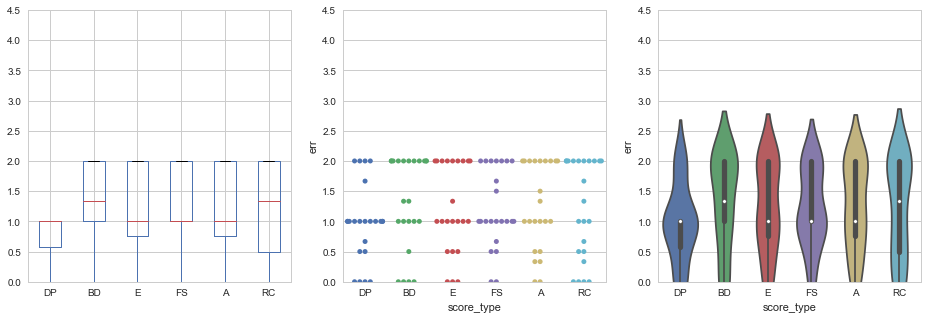

In [29]:
#######################  Base Line ####################################
Label_matrix=[]
for num in Y:
    Label_matrix.append(getlabel(num))
Label_matrix=np.array(Label_matrix)
sns.set(style="whitegrid")
fix=np.zeros((23,6))
fix+=3
ax=plt.figure(figsize=(16,5))
diff=np.abs(fix-Label_matrix)
ax = plt.subplot(131)
Diff_plot=pd.DataFrame(diff)
Diff_plot.columns = ['DP','BD','E','FS','A','RC']
Diff_plot.plot.box(ax=ax)
plt.ylim(0,4.5)

ax = plt.subplot(132)
swarm_data=get_swarm_data(Diff_plot)
ax = sns.swarmplot(x="score_type", y="err", data=swarm_data)
plt.ylim(0,4.5)

ax = plt.subplot(133)
swarm_data=get_swarm_data(Diff_plot)
ax = sns.violinplot(x="score_type", y="err", data=swarm_data)
plt.ylim(0,4.5)

print(np.sum(np.sum(Diff_plot)))
print(np.sum(Diff_plot))

video 11 video 113 video 130 video 143 video 152 video 16 video 164 video 171 video 176 video 192 video 194 video 207 video 236 video 237 video 240 video 253 video 257 video 258 video 49 video 59 video 74 video 78 video 91 total_loss=  14.923861775547266


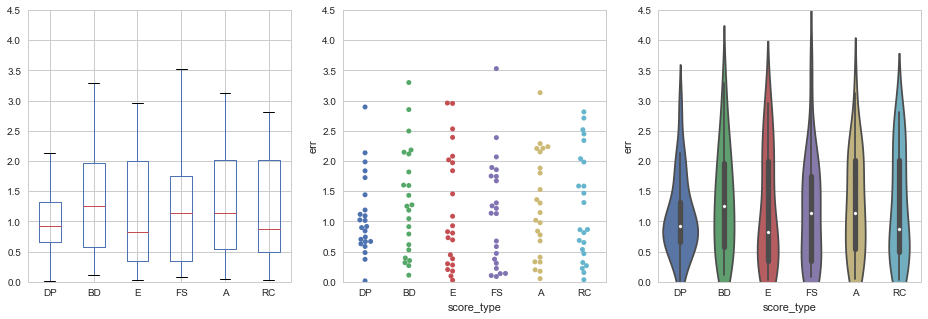

all gear score abs error 166.37237960100174
each gear score abs error
 DP    24.958286
BD    30.565960
E     27.160993
FS    26.023169
A     29.008591
RC    28.655381
dtype: float64


In [30]:
model_slection('CNN',20,0.0001,0.1,[0,1,0])

video 11 video 113 video 130 video 143 video 152 video 16 video 164 video 171 video 176 video 192 video 194 video 207 video 236 video 237 video 240 video 253 video 257 video 258 video 49 video 59 video 74 video 78 video 91 total_loss=  14.328223742544651


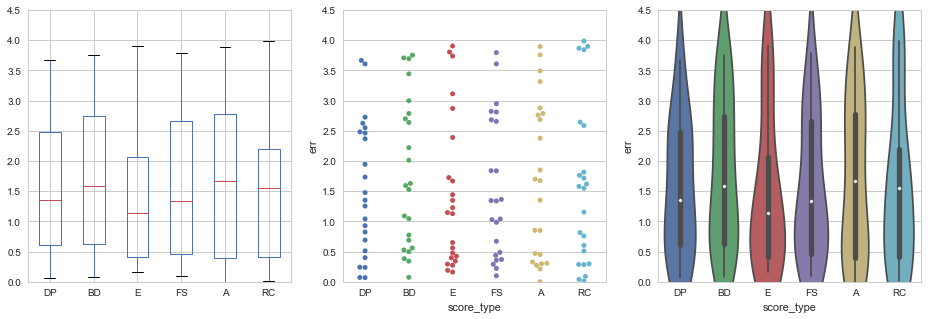

all gear score abs error 218.4340657479276
each gear score abs error
 DP    35.247112
BD    40.665338
E     33.258404
FS    35.016656
A     38.549547
RC    35.697009
dtype: float64


In [31]:
model_slection('CNN',20,0.0001,0.1,[1,0,0])

video 11 video 113 video 130 video 143 video 152 video 16 video 164 video 171 video 176 video 192 video 194 video 207 video 236 video 237 video 240 video 253 video 257 video 258 video 49 video 59 video 74 video 78 video 91 total_loss=  14.901067733764648


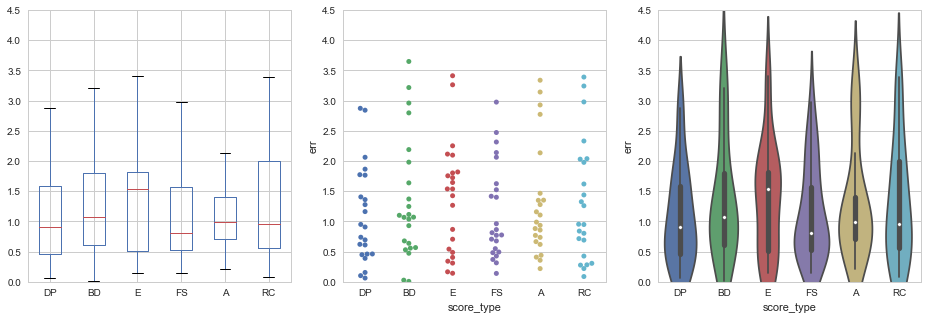

all gear score abs error 173.6718682050705
each gear score abs error
 DP    24.965400
BD    30.824451
E     31.592177
FS    26.251441
A     29.880559
RC    30.157840
dtype: float64


In [32]:
model_slection('CNN',20,0.0001,0.1,[0,0,1])

video 11 video 113 video 130 video 143 video 152 video 16 video 164 video 171 video 176 video 192 video 194 video 207 video 236 video 237 video 240 video 253 video 257 video 258 video 49 video 59 video 74 video 78 video 91 total_loss=  15.164080440998077


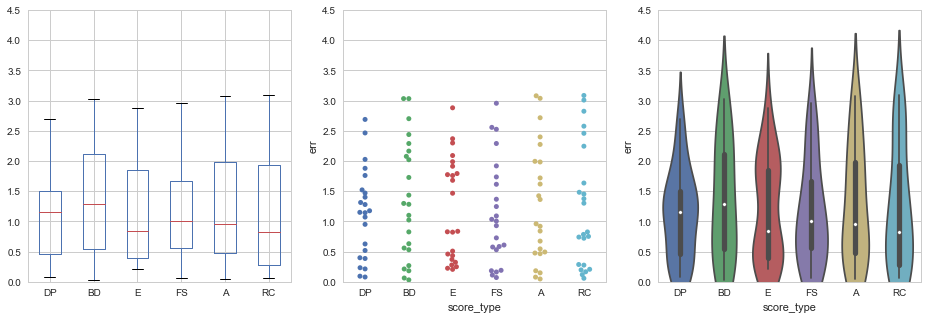

all gear score abs error 168.24773967885278
each gear score abs error
 DP    25.828269
BD    30.909107
E     27.533266
FS    25.996567
A     29.421822
RC    28.558708
dtype: float64


In [30]:
model_slection('CNN',20,0.0001,0.1,[0.333333,0.333333,0.333333])

video 11 video 113 video 130 video 143 video 152 video 16 video 164 video 171 video 176 video 192 video 194 video 207 video 236 video 237 video 240 video 253 video 257 video 258 video 49 video 59 video 74 video 78 video 91 total_loss=  17.353780567646027


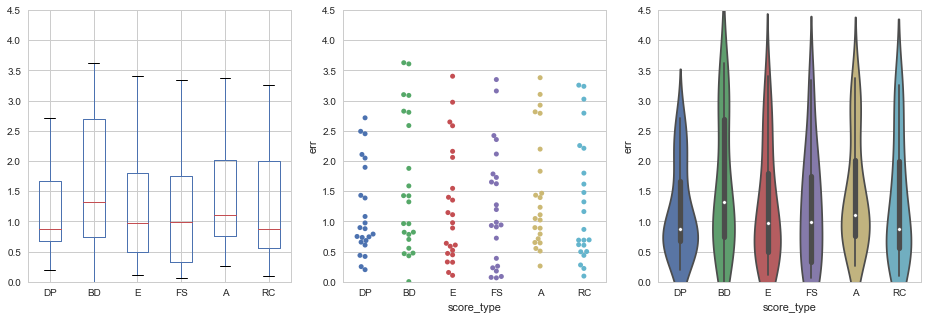

all gear score abs error 183.6656973495837
each gear score abs error
 DP    26.622069
BD    36.243986
E     28.419318
FS    28.414945
A     33.634103
RC    30.331277
dtype: float64


In [30]:
model_slection('CNN',10,0.0001,0.1,[0.333333,0.333333,0.333333])

video 11 video 113 video 130 video 143 video 152 video 16 video 164 video 171 video 176 video 192 video 194 video 207 video 236 video 237 video 240 video 253 video 257 video 258 video 49 video 59 video 74 video 78 video 91 total_loss=  14.805873692035675


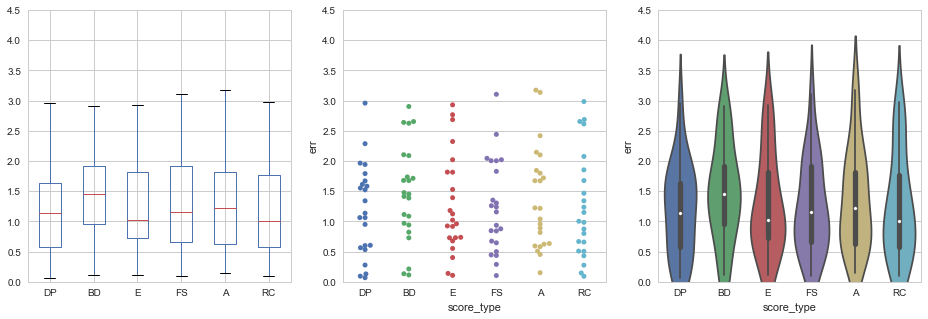

all gear score abs error 178.74686698938132
each gear score abs error
 DP    27.290378
BD    33.647014
E     29.459545
FS    28.334916
A     31.348488
RC    28.666527
dtype: float64


In [31]:
model_slection('CNN',10,0.0005,0.2,[0.333333,0.333333,0.333333])

video 11 video 113 video 130 video 143 video 152 video 16 video 164 video 171 video 176 video 192 video 194 video 207 video 236 video 237 video 240 video 253 video 257 video 258 video 49 video 59 video 74 video 78 video 91 total_loss=  15.128736972808838


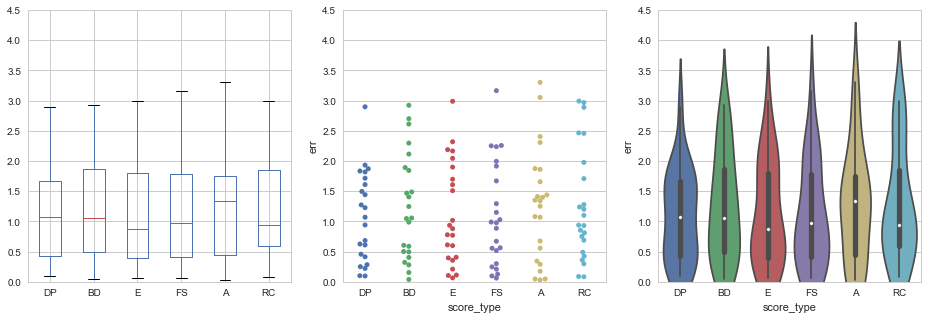

all gear score abs error 162.0154399255239
each gear score abs error
 DP    24.852800
BD    28.451526
E     25.641149
FS    25.146333
A     28.946424
RC    28.977208
dtype: float64


In [32]:
model_slection('CNN',10,0.0001,0.25,[0.333333,0.333333,0.333333])

video 11 video 113 video 130 video 143 video 152 video 16 video 164 video 171 video 176 video 192 video 194 video 207 video 236 video 237 video 240 video 253 video 257 video 258 video 49 video 59 video 74 video 78 video 91 total_loss=  12.39478313922882


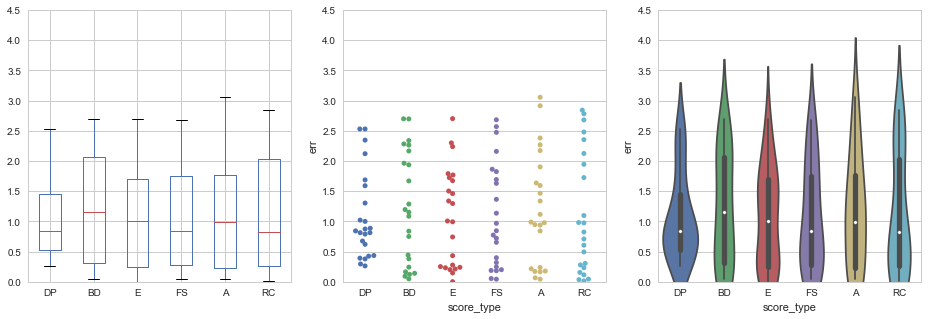

all gear score abs error 155.43382959536225
each gear score abs error
 DP    24.615638
BD    27.943817
E     24.514982
FS    24.975586
A     27.598244
RC    25.785562
dtype: float64


In [30]:
model_slection('CNN',20,0.00001,0.1,[0.333333,0.333333,0.333333])

video 11 video 113 video 130 video 143 video 152 video 16 video 164 video 171 video 176 video 192 video 194 video 207 video 236 video 237 video 240 video 253 video 257 video 258 video 49 video 59 video 74 video 78 video 91 total_loss=  14.36893192306161


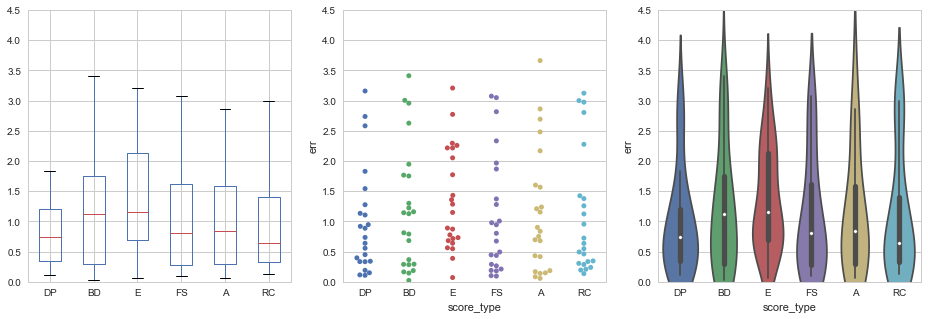

all gear score abs error 156.92899653227477
each gear score abs error
 DP    22.445568
BD    27.437126
E     30.870335
FS    24.850547
A     26.115338
RC    25.210082
dtype: float64


In [31]:
model_slection('CNN',10,0.00001,0.1,[0.333333,0.333333,0.333333])

video 11 video 113 video 130 video 143 video 152 video 16 video 164 video 171 video 176 video 192 video 194 video 207 video 236 video 237 video 240 video 253 video 257 video 258 video 49 video 59 video 74 video 78 video 91 total_loss=  13.88181072846055


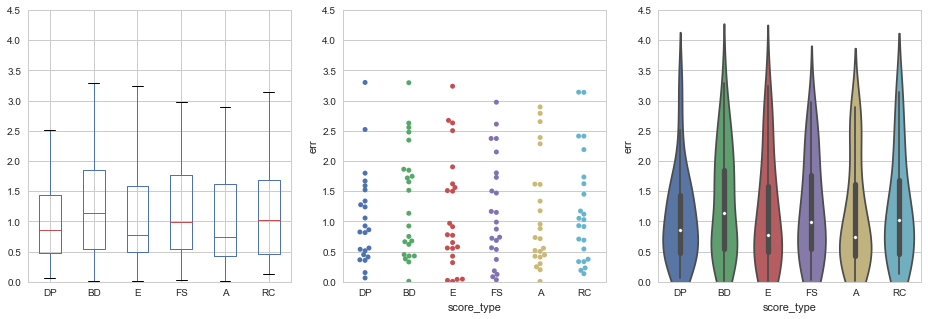

all gear score abs error 160.92862376333306
each gear score abs error
 DP    24.125252
BD    30.424497
E     25.747856
FS    27.174835
A     25.624859
RC    27.831324
dtype: float64


In [32]:
model_slection('CNN',10,0.00001,0.2,[0.333333,0.333333,0.333333])

video 11 video 113 video 130 video 143 video 152 video 16 video 164 video 171 video 176 video 192 video 194 video 207 video 236 video 237 video 240 video 253 video 257 video 258 video 49 video 59 video 74 video 78 video 91 total_loss=  14.471984326839447


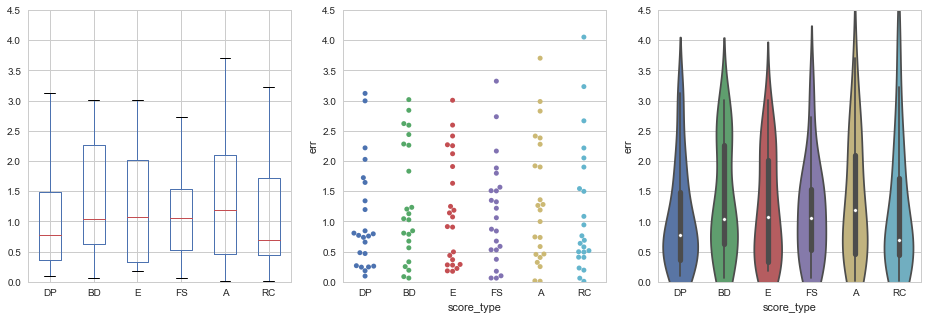

all gear score abs error 164.61127109252598
each gear score abs error
 DP    23.852867
BD    30.092142
E     27.363690
FS    26.215753
A     30.454119
RC    26.632700
dtype: float64


In [31]:
model_slection('CNN',10,0.00001,0.4,[0.333333,0.333333,0.333333])

video 11 video 113 video 130 video 143 video 152 video 16 video 164 video 171 video 176 video 192 video 194 video 207 video 236 video 237 video 240 video 253 video 257 video 258 video 49 video 59 video 74 video 78 video 91 total_loss=  15.652164556086063


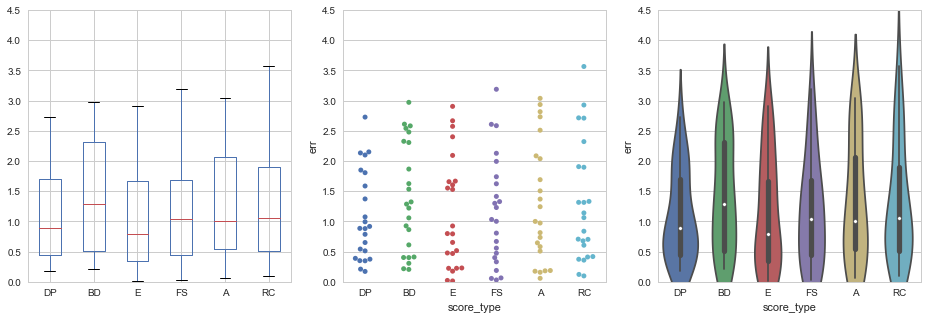

all gear score abs error 169.1800252778431
each gear score abs error
 DP    24.792793
BD    32.054310
E     26.149652
FS    26.725047
A     29.961119
RC    29.497104
dtype: float64


In [30]:
model_slection('CNN',20,0.001,0.1,[0.333333,0.333333,0.333333])

video 11 video 113 video 130 video 143 video 152 video 16 video 164 video 171 video 176 video 192 video 194 video 207 video 236 video 237 video 240 video 253 video 257 video 258 video 49 video 59 video 74 video 78 video 91 total_loss=  14.67004707455635


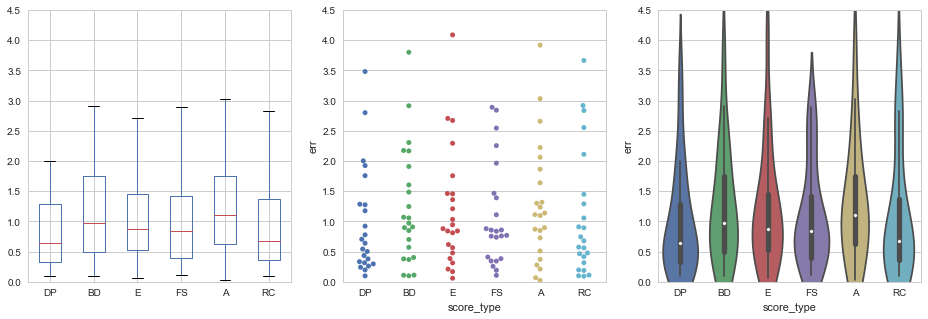

all gear score abs error 156.44790367229078
each gear score abs error
 DP    22.326706
BD    28.083898
E     27.133683
FS    24.929614
A     29.384547
RC    24.589455
dtype: float64


In [31]:
model_slection('CNN',20,0.001,0.2,[0.333333,0.333333,0.333333])

video 11 video 113 video 130 video 143 video 152 video 16 video 164 video 171 video 176 video 192 video 194 video 207 video 236 video 237 video 240 video 253 video 257 video 258 video 49 video 59 video 74 video 78 video 91 total_loss=  12.935468062758446


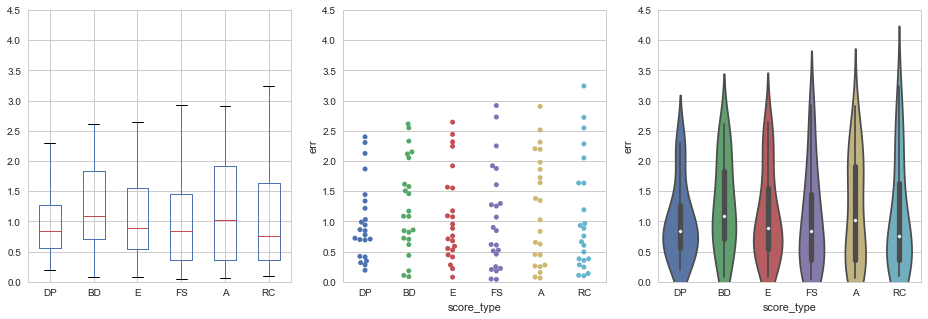

all gear score abs error 152.01662723673445
each gear score abs error
 DP    22.916547
BD    28.671066
E     25.097867
FS    23.591762
A     27.163631
RC    24.575755
dtype: float64


In [30]:
model_slection('CNN',20,0.001,0.5,[0.333333,0.333333,0.333333])

video 11 video 113 video 130 video 143 video 152 video 16 video 164 video 171 video 176 video 192 video 194 video 207 video 236 video 237 video 240 video 253 video 257 video 258 video 49 video 59 video 74 video 78 video 91 total_loss=  15.416035637259483


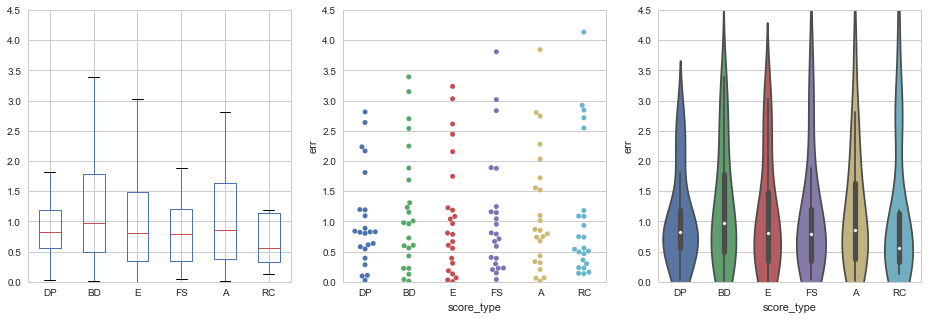

all gear score abs error 152.56880095264844
each gear score abs error
 DP    23.397030
BD    27.749793
E     25.232041
FS    24.455832
A     26.690823
RC    25.043282
dtype: float64


In [31]:
model_slection('CNN3',20,0.001,0.2,[0.333333,0.333333,0.333333])

video 11 video 113 video 130 video 143 video 152 video 16 video 164 video 171 video 176 video 192 video 194 video 207 video 236 video 237 video 240 video 253 video 257 video 258 video 49 video 59 video 74 video 78 video 91 total_loss=  17.2385356426239


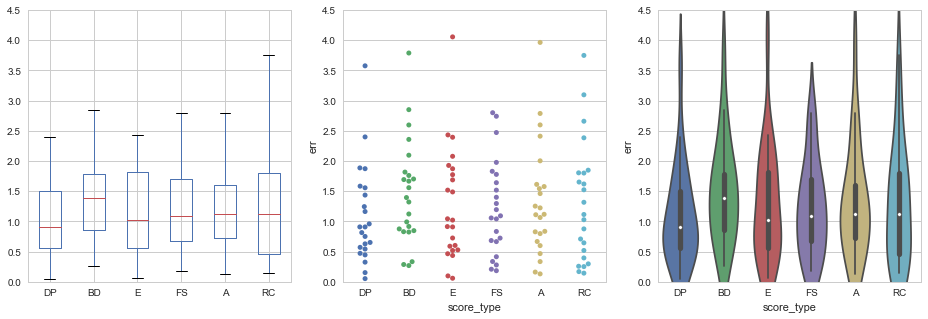

all gear score abs error 176.38770233422153
each gear score abs error
 DP    24.882662
BD    33.878707
E     29.113362
FS    28.146825
A     30.529210
RC    29.836937
dtype: float64


In [30]:
model_slection('CNN3',20,0.001,0.1,[0.333333,0.333333,0.333333])

video 11 video 113 video 130 video 143 video 152 video 16 video 164 video 171 video 176 video 192 video 194 video 207 video 236 video 237 video 240 video 253 video 257 video 258 video 49 video 59 video 74 video 78 video 91 total_loss=  14.810674116015434


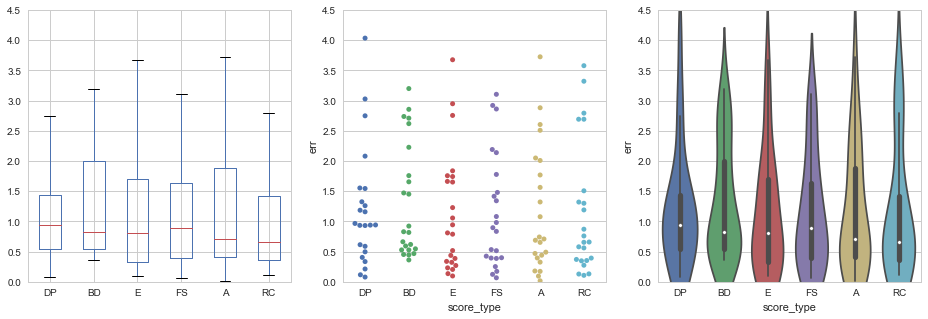

all gear score abs error 163.36961118312465
each gear score abs error
 DP    27.457508
BD    30.437256
E     25.777148
FS    26.271379
A     26.865867
RC    26.560452
dtype: float64


In [31]:
model_slection('CNN',10,0.0001,0.1,[0.333333,0.333333,0.333333])

In [ ]:
Diff_plot=[]
show_result=True
E=16
l2lam=0.0001
noise_range=0.1
poolingweight=[0,1,0]

total_loss=0
model_name='CNN3'
# for i in [11, 113, 130]:
for i in Y:
    print('video',i,end=' ')
    loss,each_diff=test_hold_out(model_name,i,E,show_result,l2lam,noise_range,poolingweight)
    total_loss=total_loss+loss
    Diff_plot.append(each_diff)


Diff_plot=np.array(Diff_plot)
Diff_plot=pd.DataFrame(Diff_plot)
Diff_plot.columns = ['DP','BD','E','FS','A','RC']
Diff_plot.plot.box()
plt.ylim(0,4.5)
print('total_loss= ',total_loss)
print('all 6 gear score error',np.sum(Diff_plot))

GlobalMaxPooling1D, Falttern, GlobalMaxPooling1D+var  these three method did not have significant difference.<br>
No regularizer + early stop is the current best method.<br>
Latge regularizer makes smooth and average curve and the predict line tends to be stright 